2022 级周学习记录报告
===================================

<font face='宋体' size = 20>
<table>
    <tr>
        <td><p align='left'>时间：2022.07.04 - 2022.07.10</p></td>
        <td><p align='left'>报告人：姜伟鹏</p></td>
    </tr>
    <tr>
        <td><p align='left'>审阅人：陈熠金</p></td>
        <td><p align='left'>导师：梁 云</p></td>
    </tr>
    <tr>
        <td><p align='left'>月计划：  

（1） 完成数字图像处理学习；  
（2） 完成机器学习；  
（3） 在 Ubuntu 系统使用 pytorch 进行简单的机器学习算法的验证；  
（4） 分步实现如下：  
第一周：数字图像的数据表示、边缘计算等；机器学习基本概念、计算机实验环境配置；  
第二周：图像修复、噪声处理等；线性回归、误差处理；  
第三周：图像分割相关理论；Gradient Descent；  
第四周：图像偏微分运算相关理论；深度学习优化方法；  
        </p></td>
        <td><p align='left'>本周环节：  

（1） 学习了图像修复中对于加性噪声和退化现象的相关处理方法；  
（2） 使用 python 完成了图像处理课程进行的部分演示，暂时不能自行实现维纳滤波；  
（3） 学习了机器学习中线性回归及其优化方法，尝试运行了课程课后作业；  
下周计划：继续学习基础理论，对本周代码充分理解并部分重写，继续尝试图像处理算法实现；  
        </p></td>
    </tr>
</table>
</font>

Part 1：图像处理——图像修复（Restoration）
======================================


# 图像修复（复原）
&emsp;&emsp;以某种预定方式改进图像，与图像增强不同，图像复原利用**退化（Degradation）**现象的先验知识，建模退化过程并应用**逆过程**对退化图像 $g(x,y)$ 进行修复，得到原图像 $f(x,y)$ 的一个估计 $\hat{f}(x,y)$。

* 对修复过程进行建模：
![pic](pics/restoration_model.png "model")

* 退化图像：
$$
g(x,y) = (h\otimes f)(x,y) + \eta(x,y)  \\
\otimes —— 卷积运算
$$

* 频率域等效公式：
$$
G(u,v) = H(u,v)F(u,v) + N(u,v)
$$

## 主要六种噪声类型：
![pic](pics/noise_type.png "noise types")

* 噪声性质有两类：**加性噪声**与信号无关，本身存在；**乘性噪声**一般由信道引起，与信号相乘，可以通过傅里叶变换转换成加性。
* 噪声来源：传感器、光照环境、信号传输过程、图像处理过程。

* 高斯（Gaussian）:  实际的系统中不存在，但可以很好地对各种噪声进行**模拟**，方便数学计算。
$$
\begin{equation}
p(z) = \frac{1}{\sqrt{2\pi}\sigma}e^{-(z-\bar{z})^2/2\sigma^2}, -\infty < z < \infty
\end{equation}
\tag{1}
$$  
  
  
* 瑞利（Reyleigh）:  对设备噪声的模拟具有较好效果。
$$
\begin{equation}
p(z) = 
\left\{
\begin{array}{}
\frac{2}{b} (z - a)e^{-(z - a)^2 \over b}\quad &z \ge a
\\
0\quad &z \le a
\end{array}
\right. 
\\
\bar{z} = a + \sqrt{\pi b \over 4}, \quad
\sigma^2 = \frac{b(4 - \pi)}{4}
\end{equation}
\tag{2}
$$  

* 爱尔兰 / 伽马（Erlang / Gamma）：
$$
\begin{equation}
p(z) = 
\left\{
\begin{array}{}
\frac{a^bz^{b-1}}{(b-1)!} e^{-az}\quad &z \ge 0
\\
0\quad &z \lt 0
\end{array}
\right. 
\\
\bar{z} = \frac{b}{a}, \quad
\sigma^2 = \frac{b}{a^2}
\end{equation}
\tag{3}
$$  


* 指数（Exponential）:  不对称，不存在负噪声。
$$
\begin{equation}
p(z) = 
\left\{
\begin{array}{}
ae^{-az} \quad &z \ge 0
\\
0 \quad &z \lt 0
\end{array}
\right. 
\\
\bar{z} = a + \sqrt{\pi b \over 4}, \quad
\sigma^2 = \frac{b(4 - \pi)}{4}
\end{equation}
\tag{4}
$$  
  
  
* 均匀（Uniform）:  设备量化采样时取中间值，可以作为量化过程的噪声模型。一般来自设备以及对图片的操作。
$$
\begin{equation}
p(z)  =
\left\{
\begin{array}{}
\frac{1}{b - a} \quad & a \le z \le b
\\
0 \quad & other
\end{array}
\right.
\\
\bar{z} = \frac{a+b}{2}, \quad
\sigma^2 = 0
\end{equation}
\tag{5}
$$


* 脉冲 / 椒盐（Impulse / Pepper & Salt）：黑白相间的亮暗点噪声。
$$
\begin{equation}
p(z)  =
\left\{
\begin{array}{}
P_s \quad & z = 2^k - 1
\\
P_p \quad & z = 0
\\
1 - (P_s+P_p) \quad & z = V
\end{array}
\right.
\\
\bar{z} = (0)P_p + K(1 - P_s - P_p) + (2^k - 1)P_s
\\
\sigma^2 = (0 - \bar{z})^2P_p + (K - \bar{z})^2(1 - P_s - P_p) + (2^k - 1)^2P_s
\end{equation}
\tag{5}
$$


* MATLAB：加噪

* Python:
> reference: <https://blog.csdn.net/youcans/article/details/122795650>

In [94]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# 添加高斯噪声
def gaussian_noise(src, mean=0, sigma=0):
    '''
    按照正态分布，生成整个图片各个点的随机偏移值，叠加到原图，均值一般为 0
    '''
    dst = src.copy()
    noise = np.random.normal(mean, sigma, src.shape)  # 根据均值和标准差生成噪声图
    # print("noise =", noise.astype(np.int8))
    dst += noise.astype(dst.dtype)
    dst = np.uint8(np.clip(dst, 0, 255))
    return dst


# 添加指数噪声
def exponential_noise(src, scale = 1.0):
    dst = src.copy()
    noise = np.random.exponential(scale, dst.shape)
    dst += noise.astype(dst.dtype)
    dst = np.uint8(np.clip(dst, 0, 255))
    return dst


# 添加均衡噪声
def uniform_noise(src, mean = 0, sigma = 0):
    dst = src.copy()
    a = 2 * mean - np.sqrt(12 * sigma)
    b = 2 * mean + np.sqrt(12 * sigma)
    noise = np.random.uniform(a, b, dst.shape)
    dst += noise.astype(dst.dtype)
    dst = np.uint8(np.clip(dst, 0, 255))
    return dst


# 添加椒盐噪声
def peppernsalt_noise(src, ps = 0, pp = 0):
    dst = src.copy()
    mask = np.random.choice((0, 0.5, 1), size=dst.shape[:2], p=[pp, (1 - ps - pp), ps])
    dst[mask==1] = 255
    dst[mask==0] = 0
    return dst



In [95]:
img_gray = cv2.imread('pics/saturn.png', cv2.IMREAD_GRAYSCALE)
img_gaussian25 = gaussian_noise(img_gray, 0, 25)
img_snp002 = peppernsalt_noise(img_gray, 0.01, 0.01)
img_snp02 = peppernsalt_noise(img_gray, 0.1, 0.1)

cv2.imwrite("pics/gray.png", img_gray)
cv2.imwrite("pics/gaussian_noise25.png", img_gaussian25)
cv2.imwrite("pics/saltnpepper002.png", img_snp002)
cv2.imwrite("pics/saltnpepper02.png", img_snp02)

True

* 由于 matplotlib 的缩小显示会压缩掉噪点，因此输出图片再使用 markdown 插入显示

* 原图：
![pic](pics/saturn.png "origin")  


* 灰图：
![pic](pics/gray.png "gray")  


* 高斯噪声：$\bar{z} = 0$, $\sigma = 64$
![pic](pics/gaussian_noise25.png "gaussian noise")  


* 椒盐噪声：2%
![pic](pics/saltnpepper002.png "salt&pepper 2%")  


* 椒盐噪声：20%
![pic](pics/saltnpepper02.png "salt&pepper 20%")  


# 噪声评估

* 通过直方图评估噪声：一个图片的**整体**直方图往往**无法识别**噪声类型，两种方法，一是采用**局部分割**，二是**切分直方图**。如果不知道噪声类型，就使用不同的分布函数进行拟合，选择误差最小的一个分布函数与分布参数，虽然可能不是原噪声类型，却可以很好地估测。

假设：
$$
g(x,y) = f(x,y) + \eta(x,y)
$$

需要取得最小值：
$$
min(||f(x,y) - g(x,y)||^2)
$$

* 以三灰度级图片为例并绘制直方图：

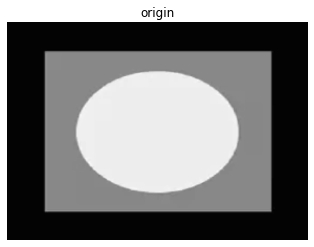

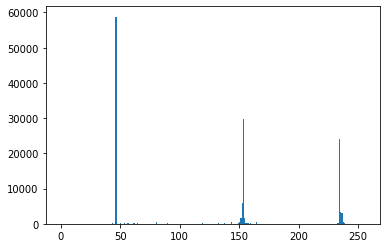

In [96]:
import matplotlib.pyplot as plt
import cv2


three_gray = cv2.imread("pics/three_gray.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(three_gray, 'gray'), plt.axis('off'), plt.title('origin')
plt.show()

plt.hist(three_gray.ravel(), 256, [0, 256])
plt.show()

* 添加均匀噪声：

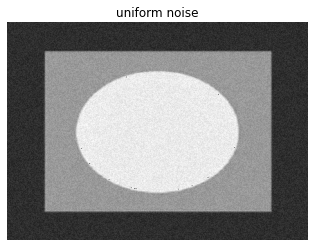

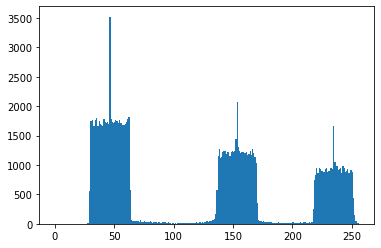

In [97]:
three_gray_uniform = uniform_noise(three_gray, 0, 25)

plt.imshow(three_gray_uniform, 'gray'), plt.axis('off'), plt.title('uniform noise')
plt.show()

plt.hist(three_gray_uniform.ravel(), 256, [0, 256])
plt.show()

* 添加高斯噪声：

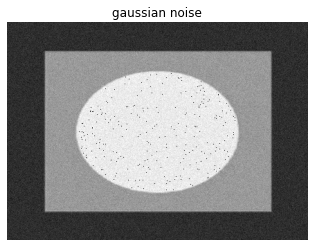

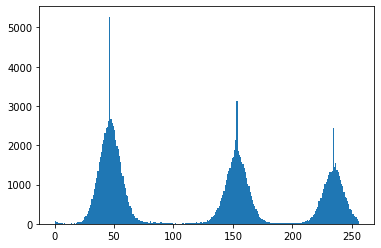

In [98]:
three_gray_gaussian9 = gaussian_noise(three_gray, 0, 9)

plt.imshow(three_gray_gaussian9, 'gray'), plt.axis('off'), plt.title('gaussian noise')
plt.show()

plt.hist(three_gray_gaussian9.ravel(), 256, [0, 256])
plt.show()

* 添加椒盐噪声：

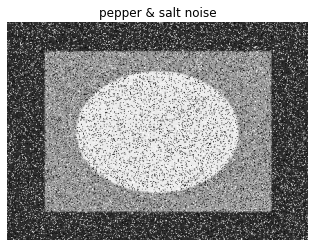

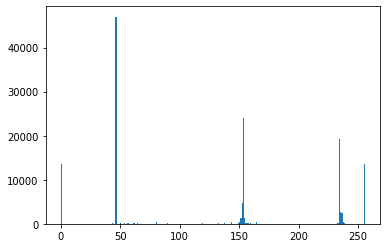

In [99]:
three_gray_pns = peppernsalt_noise(three_gray, 0.1, 0.1)

plt.imshow(three_gray_pns, 'gray'), plt.axis('off'), plt.title('pepper & salt noise')
plt.show()

plt.hist(three_gray_pns.ravel(), 256, [0, 256])
plt.show()

* 对椒盐噪声中值滤波：

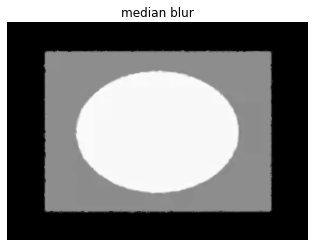

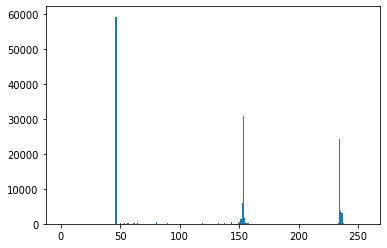

In [100]:
median_blur = cv2.medianBlur(three_gray_pns, 5)

plt.imshow(median_blur, 'gray'), plt.axis('off'), plt.title('median blur')
plt.show()

plt.hist(median_blur.ravel(), 256, [0, 256])
plt.show()

## 逆变换与维纳滤波（Winener Blur）:
&emsp;&emsp;运动模糊主要通过**逆变换**和**维纳（最小方差）滤波**处理。逆滤波对**加性噪声敏感**，无法直接使用，而维纳滤波的能有更好的表现。假设已知退化函数（忽略噪声），可以尝试进行逆变换。维纳滤波通过期望和原信息的部分统计特征进行估计。

* 对于退化函数获取：设置一张已知的图片，让设备进行采样，以校准摄像机，用于调整和评估摄像头工作状况。
* 暂不讨论物像原本就模糊的情况。
* 运动模糊：可以当作是图片多次平移后不断向加，模糊程度显然取决于运动速度。
* 方差：原信号和重建信号之间的平方误差期望值。  


* 逆变换退化函数估计：
$$
H_s(u,v) = \frac{G_s(u,v)}{\hat{F}_s(u,v)}
$$
&emsp;&emsp;$g_s$ —— 观察子图像  
&emsp;&emsp;$\hat{f}_s$ —— 处理后的子图像

* 维纳滤波：<http://en.wikipedia.org/wiki/Wiener_filter>
$$
e^2 = E[(f(x,y) - \hat{f}(x,y))^2],\quad \hat{F}(u, v) = \frac{H^*(u, v)}{H^2(u,v) + \frac{S_\eta}{S_f}}G(u,v) ,\quad \frac{S_\eta}{S_f} = K
$$  
&emsp;&emsp;$K$ —— 常数，代替难以评估的 $S_\eta$ 和 $S_f$，通过反复尝试确定

* Matlab：加噪与去噪

* Python:
> 参考：<https://its301.com/article/wsp_1138886114/95024180>

In [101]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import fft
import math
import cv2


# 仿真运动模糊
def motion_process(image_size, motion_angle):
    PSF = np.zeros(image_size)
    print(image_size)
    center_position = (image_size[0] - 1) / 2
    print(center_position)

    slope_tan = math.tan(motion_angle * math.pi / 180)
    slope_cot = 1 / slope_tan
    if slope_tan <= 1:
        for i in range(15):
            offset = round(i * slope_tan)  # ((center_position-i)*slope_tan)
            PSF[int(center_position + offset), int(center_position - offset)] = 1
        return PSF / PSF.sum()  # 对点扩散函数进行归一化亮度
    else:
        for i in range(15):
            offset = round(i * slope_cot)
            PSF[int(center_position - offset), int(center_position + offset)] = 1
        return PSF / PSF.sum()


# 对图片进行运动模糊
def make_blurred(input, PSF, eps):
    input_fft = fft.fft2(input)  # 进行二维数组的傅里叶变换
    PSF_fft = fft.fft2(PSF) + eps
    blurred = fft.ifft2(input_fft * PSF_fft)
    blurred = np.abs(fft.fftshift(blurred))
    return blurred


def inverse(input, PSF, eps):  # 逆滤波
    input_fft = fft.fft2(input)
    PSF_fft = fft.fft2(PSF) + eps  # 噪声功率，这是已知的，考虑epsilon
    result = fft.ifft2(input_fft / PSF_fft)  # 计算F(u,v)的傅里叶反变换
    result = np.abs(fft.fftshift(result))
    return result


def wiener(input, PSF, eps, K=0.01):  # 维纳滤波，K=0.01
    input_fft = fft.fft2(input)
    PSF_fft = fft.fft2(PSF) + eps
    PSF_fft_1 = np.conj(PSF_fft) / (np.abs(PSF_fft) ** 2 + K)
    result = fft.ifft2(input_fft * PSF_fft_1)
    result = np.abs(fft.fftshift(result))
    return result


def normal(array):
    array = np.where(array < 0, 0, array)
    array = np.where(array > 255, 255, array)
    array = array.astype(np.int16)
    return array



In [102]:
gray = cv2.imread('pics/gray.png', cv2.IMREAD_GRAYSCALE)

img_h, img_w = gray.shape[:2]

PSF = motion_process((img_h, img_w), 60)  # 进行运动模糊处理
blurred = np.abs(make_blurred(gray, PSF, 1e-3))

result_blurred = inverse(blurred, PSF, 1e-3)  # 逆滤波
result_wiener = wiener(blurred, PSF, 1e-3)  # 维纳滤波

blurred_noisy = blurred + 0.1 * blurred.std() * \
    np.random.standard_normal(blurred.shape)  # 添加噪声,standard_normal产生随机的函数
inverse_mo2no = inverse(blurred_noisy, PSF, 0.1 + 1e-3)  # 对添加噪声的图像进行逆滤波
wiener_mo2no = wiener(blurred_noisy, PSF, 0.1 + 1e-3)  # 对添加噪声的图像进行维纳滤波

cv2.imwrite("pics/blurred.png", blurred)
cv2.imwrite("pics/result_blurred.png", result_blurred)
cv2.imwrite("pics/result_wiener.png", result_wiener)
cv2.imwrite("pics/blurred_noisy.png", blurred_noisy)
cv2.imwrite("pics/inverse_mo2no.png", inverse_mo2no)
cv2.imwrite("pics/wiener_mo2no.png", wiener_mo2no)

(1500, 1200)
749.5


True

* 原图：
![pic](pics/gray.png "gray")


* 运动模糊图片：
![pic](pics/blurred.png "blurred")


* 逆滤波：
![pic](pics/result_blurred.png "inverse of blurred")


* 维纳滤波：
![pic](pics/result_wiener.png "wiener")


* 添加高斯噪声：
![pic](pics/blurred_noisy.png "gaussian")


* 对添加噪声图片逆滤波：
![pic](pics/inverse_mo2no.png "inverse of blurred noisy")


* 对添加噪声图片维纳滤波：
![pic](pics/wiener_mo2no.png "wiener of blurred noisy")


Part 2：机器学习——线性回归（Linear Regression）
=====================================

# 线性模型（Linear Model）
&emsp;&emsp;构建一个通过各种**属性（Attribute / Feature）**的线性组合来预测数值的函数，每种属性对应一个**权重（Weight）**，具有很好的可解释性。

* **损失函数（Loss Function）**：衡量模型函数的好坏的函数，函数的每一个点都代表一个函数的表现，数值越小越好，常采用**均方误差（Mean Square Error）**，求解其最小化的过程称为线性回归模型的最小二乘”**参数估计（Parameter Estimation）**“，要使其最小，需要不断调整更新，可以通过**梯度下降（Gradient Descent）**完成，影响更新幅度的参数 $\eta$ 称为**学习速率（Learning Rate）**。


* 建立回归模型三个步骤：
    1. 建模（函数集合）
    2. 函数评价（损失函数）
    3. 取得损失最小的函数，进行梯度下降更新，反复计算得到最佳参数组合


* 一般线性模型：
$$
f(x) = b + \sum w_ix_i
$$

* 常用均方差损失函数：
$$
L(f) = L(w, b) = \sum (\hat{y}^n - (b + wx^n))^2
\\
(w^*,b^*) = arg\,\min_{(w,b)}L
$$


## 重新建模
&emsp;&emsp;我们关注的是模型的**泛化（Generalization）性能**，一次函数拟合训练集的误差较大，称为**欠拟合（Underfitting）**函数越复杂，在训练集、验证集上的拟合程度越高，但可能导致实际测试时误差大，称为**过拟合（Overfitting）**。

## 重新评估
&emsp;&emsp;先验知识可以帮助筛取属性，但一般无法做到。
&emsp;&emsp;在损失函数中加入**正则化（Regularization）**作为对属性权重的惩罚，让函数更加平滑，以减小噪声（无关参数）影响


## 关于误差（Error）
&emsp;&emsp;来源有两个，**偏差（Bias）和方差（Variance）**，偏差与模型本身有关，过大只能重新设计模型（更复杂）；方差与训练集数量有关，排除欠拟合的情况，训练集越多越小，如果标记数据难以获取，通过。


## 关于可靠性
&emsp;&emsp;直接通过训练集得到的模型性能好并不代表在测试集上表现会好。
* 交叉验证（Cross Validation）：将标记数据划分三份：训练集（Training Set）、验证集（Validation Set）、测试集（Testing Set）。
* N 折交叉验证：数据划分成很多小份，打乱排列形成很多份。

# 李宏毅第一次作业 Demo

In [103]:
import sys
import pandas as pd
import numpy as np

## Load 'train.csv'

In [104]:
data = pd.read_csv('data/train.csv', encoding = 'big5')

## Processing

In [105]:
data = data.iloc[:, 3:]
data[data == 'NR'] = 0
raw_data = data.to_numpy()

## Extract Features 1
&emsp;&emsp;4320 * 18 的资料依照每个月分成 12 个 18 (features) * 480 (hours) 的资料

In [106]:
month_data = {}
for month in range(12):
    sample = np.empty([18, 480])
    for day in range(20):
        sample[:, day * 24 : (day + 1) * 24] = raw_data[18 * (20 * month + day) : 18 * (20 * month + day + 1), :]
    month_data[month] = sample

## Extract Feature 2

每个月 480 h，每 9 小时一个 data，每个月 471 个 data，总共 471 * 12 个，每部分 9 * 18 个，对应的 target 471 * 12 个

In [107]:
x = np.empty([12 * 471, 18 * 9], dtype = float)
y = np.empty([12 * 471, 1], dtype = float)
for month in range(12):
    for day in range(20):
        for hour in range(24):
            if day == 19 and hour > 14:
                continue
            x[month * 471 + day * 24 + hour, :] = month_data[month][:,day * 24 + hour : day * 24 + hour + 9].reshape(1, -1) #vector dim:18*9 (9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9)
            y[month * 471 + day * 24 + hour, 0] = month_data[month][9, day * 24 + hour + 9] #value
print(x)
print(y)

[[14.  14.  14.  ...  2.   2.   0.5]
 [14.  14.  13.  ...  2.   0.5  0.3]
 [14.  13.  12.  ...  0.5  0.3  0.8]
 ...
 [17.  18.  19.  ...  1.1  1.4  1.3]
 [18.  19.  18.  ...  1.4  1.3  1.6]
 [19.  18.  17.  ...  1.3  1.6  1.8]]
[[30.]
 [41.]
 [44.]
 ...
 [17.]
 [24.]
 [29.]]


## Normalize 1

In [108]:
mean_x = np.mean(x, axis = 0) #18 * 9 
std_x = np.std(x, axis = 0) #18 * 9 
for i in range(len(x)): #12 * 471
    for j in range(len(x[0])): #18 * 9 
        if std_x[j] != 0:
            x[i][j] = (x[i][j] - mean_x[j]) / std_x[j]
x

array([[-1.35825331, -1.35883937, -1.359222  , ...,  0.26650729,
         0.2656797 , -1.14082131],
       [-1.35825331, -1.35883937, -1.51819928, ...,  0.26650729,
        -1.13963133, -1.32832904],
       [-1.35825331, -1.51789368, -1.67717656, ..., -1.13923451,
        -1.32700613, -0.85955971],
       ...,
       [-0.88092053, -0.72262212, -0.56433559, ..., -0.57693779,
        -0.29644471, -0.39079039],
       [-0.7218096 , -0.56356781, -0.72331287, ..., -0.29578943,
        -0.39013211, -0.1095288 ],
       [-0.56269867, -0.72262212, -0.88229015, ..., -0.38950555,
        -0.10906991,  0.07797893]])

Split Training Data Into "train_set" and "validation_set" 针对 report 第二、第三题示范，以生成比较中用来训练的 train_set 不会被放入训练，只用于 validation。

In [109]:
import math
x_train_set = x[: math.floor(len(x) * 0.8), :]
y_train_set = y[: math.floor(len(y) * 0.8), :]
x_validation = x[math.floor(len(x) * 0.8): , :]
y_validation = y[math.floor(len(y) * 0.8): , :]
print(x_train_set)
print(y_train_set)
print(x_validation)
print(y_validation)
print(len(x_train_set))
print(len(y_train_set))
print(len(x_validation))
print(len(y_validation))

[[-1.35825331 -1.35883937 -1.359222   ...  0.26650729  0.2656797
  -1.14082131]
 [-1.35825331 -1.35883937 -1.51819928 ...  0.26650729 -1.13963133
  -1.32832904]
 [-1.35825331 -1.51789368 -1.67717656 ... -1.13923451 -1.32700613
  -0.85955971]
 ...
 [ 0.86929969  0.70886668  0.38952809 ...  1.39110073  0.2656797
  -0.39079039]
 [ 0.71018876  0.39075806  0.07157353 ...  0.26650729 -0.39013211
  -0.39079039]
 [ 0.3919669   0.07264944  0.07157353 ... -0.38950555 -0.39013211
  -0.85955971]]
[[30.]
 [41.]
 [44.]
 ...
 [ 7.]
 [ 5.]
 [14.]]
[[ 0.07374504  0.07264944  0.07157353 ... -0.38950555 -0.85856912
  -0.57829812]
 [ 0.07374504  0.07264944  0.23055081 ... -0.85808615 -0.57750692
   0.54674825]
 [ 0.07374504  0.23170375  0.23055081 ... -0.57693779  0.54674191
  -0.1095288 ]
 ...
 [-0.88092053 -0.72262212 -0.56433559 ... -0.57693779 -0.29644471
  -0.39079039]
 [-0.7218096  -0.56356781 -0.72331287 ... -0.29578943 -0.39013211
  -0.1095288 ]
 [-0.56269867 -0.72262212 -0.88229015 ... -0.3895055

## Training

采用 Root Mean Square Error

有常数项，dim 多家一栏；eps 是防止 adagrad 的分母为 0 的极小值

每一个 dim 对应各自的 gradient, weight，每一次遍历学习

In [110]:
dim = 18 * 9 + 1
w = np.zeros([dim, 1])
x = np.concatenate((np.ones([12 * 471, 1]), x), axis = 1).astype(float)
learning_rate = 100
iter_time = 1000
adagrad = np.zeros([dim, 1])
eps = 0.0000000001
for t in range(iter_time):
    loss = np.sqrt(np.sum(np.power(np.dot(x, w) - y, 2))/471/12)#rmse
    if(t%100==0):
        print(str(t) + ":" + str(loss))
    gradient = 2 * np.dot(x.transpose(), np.dot(x, w) - y) #dim*1
    adagrad += gradient ** 2
    w = w - learning_rate * gradient / np.sqrt(adagrad + eps)
np.save('weight.npy', w)
w

0:27.071214829194115
100:33.78905859777453
200:19.91375129819709
300:13.53106819368969
400:10.645466158446174
500:9.27735345547507
600:8.518042045956507
700:8.014061987588427
800:7.6367568247756985
900:7.336563740371131


array([[ 2.13740269e+01],
       [ 3.58888909e+00],
       [ 4.56386323e+00],
       [ 2.16307023e+00],
       [-6.58545223e+00],
       [-3.38885580e+01],
       [ 3.22235518e+01],
       [ 3.49340354e+00],
       [-4.60308671e+00],
       [-1.02374754e+00],
       [-3.96791501e-01],
       [-1.06908800e-01],
       [ 2.22488184e-01],
       [ 8.99634117e-02],
       [ 1.31243105e-01],
       [ 2.15894989e-02],
       [-1.52867263e-01],
       [ 4.54087776e-02],
       [ 5.20999235e-01],
       [ 1.60824213e-01],
       [-3.17709451e-02],
       [ 1.28529025e-02],
       [-1.76839437e-01],
       [ 1.71241371e-01],
       [-1.31190032e-01],
       [-3.51614451e-02],
       [ 1.00826192e-01],
       [ 3.45018257e-01],
       [ 4.00130315e-02],
       [ 2.54331382e-02],
       [-5.04425219e-01],
       [ 3.71483018e-01],
       [ 8.46357671e-01],
       [-8.11920428e-01],
       [-8.00217575e-02],
       [ 1.52737711e-01],
       [ 2.64915130e-01],
       [-5.19860416e-02],
       [-2.5

## Testing

载入 test.csv 并以与训练资料类似的预处理和特征提取的方式处理，使 test 数据形成 240 个维度为 18 * 9 + 1 的资料

In [111]:
# testdata = pd.read_csv('gdrive/My Drive/hw1-regression/test.csv', header = None, encoding = 'big5')
testdata = pd.read_csv('data/test.csv', header = None, encoding = 'big5')
test_data = testdata.iloc[:, 2:]
test_data[test_data == 'NR'] = 0
test_data = test_data.to_numpy()
test_x = np.empty([240, 18*9], dtype = float)
for i in range(240):
    test_x[i, :] = test_data[18 * i: 18* (i + 1), :].reshape(1, -1)
for i in range(len(test_x)):
    for j in range(len(test_x[0])):
        if std_x[j] != 0:
            test_x[i][j] = (test_x[i][j] - mean_x[j]) / std_x[j]
test_x = np.concatenate((np.ones([240, 1]), test_x), axis = 1).astype(float)
test_x

C:\Users\RFsmen\AppData\Local\Temp\ipykernel_29396\2243266874.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[test_data == 'NR'] = 0
C:\Users\RFsmen\AppData\Local\Temp\ipykernel_29396\2243266874.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[test_data == 'NR'] = 0


array([[ 1.        , -0.24447681, -0.24545919, ..., -0.67065391,
        -1.04594393,  0.07797893],
       [ 1.        , -1.35825331, -1.51789368, ...,  0.17279117,
        -0.10906991, -0.48454426],
       [ 1.        ,  1.5057434 ,  1.34508393, ..., -1.32666675,
        -1.04594393, -0.57829812],
       ...,
       [ 1.        ,  0.3919669 ,  0.54981237, ...,  0.26650729,
        -0.20275731,  1.20302531],
       [ 1.        , -1.8355861 , -1.8360023 , ..., -1.04551839,
        -1.13963133, -1.14082131],
       [ 1.        , -1.35825331, -1.35883937, ...,  2.98427476,
         3.26367657,  1.76554849]])

## Prediction

训练出的 weight 用来预测 target

In [112]:
w = np.load('weight.npy')
ans_y = np.dot(test_x, w)
ans_y

array([[ 5.17496040e+00],
       [ 1.83062143e+01],
       [ 2.04912181e+01],
       [ 1.15239429e+01],
       [ 2.66160568e+01],
       [ 2.05313481e+01],
       [ 2.19065510e+01],
       [ 3.17364687e+01],
       [ 1.33916741e+01],
       [ 6.44564665e+01],
       [ 2.02645688e+01],
       [ 1.53585761e+01],
       [ 6.85894728e+01],
       [ 4.84281137e+01],
       [ 1.87023338e+01],
       [ 1.01885957e+01],
       [ 3.07403629e+01],
       [ 7.11322178e+01],
       [-4.13051739e+00],
       [ 1.82356940e+01],
       [ 3.85789223e+01],
       [ 7.13115197e+01],
       [ 7.41034816e+00],
       [ 1.87179553e+01],
       [ 1.49372503e+01],
       [ 3.67197367e+01],
       [ 1.79616970e+01],
       [ 7.57894629e+01],
       [ 1.23093102e+01],
       [ 5.62953517e+01],
       [ 2.51131609e+01],
       [ 4.61024867e+00],
       [ 2.48377055e+00],
       [ 2.47594223e+01],
       [ 3.04802805e+01],
       [ 3.84639307e+01],
       [ 4.42023106e+01],
       [ 3.00868360e+01],
       [ 4.0

## Save Result

In [113]:
import csv
with open('submit.csv', mode='w', newline='') as submit_file:
    csv_writer = csv.writer(submit_file)
    header = ['id', 'value']
    print(header)
    csv_writer.writerow(header)
    for i in range(240):
        row = ['id_' + str(i), ans_y[i][0]]
        csv_writer.writerow(row)
        print(row)

['id', 'value']
['id_0', 5.174960398984753]
['id_1', 18.306214253527862]
['id_2', 20.491218094180518]
['id_3', 11.523942869805342]
['id_4', 26.616056752306115]
['id_5', 20.531348081761198]
['id_6', 21.906551018797405]
['id_7', 31.736468747068823]
['id_8', 13.391674055111665]
['id_9', 64.45646650291953]
['id_10', 20.264568836159427]
['id_11', 15.358576077361224]
['id_12', 68.58947276926722]
['id_13', 48.42811374745714]
['id_14', 18.702333824193154]
['id_15', 10.188595737466688]
['id_16', 30.740362859820436]
['id_17', 71.13221776355113]
['id_18', -4.130517391262459]
['id_19', 18.235694016428692]
['id_20', 38.578922275007734]
['id_21', 71.31151972531329]
['id_22', 7.410348162634087]
['id_23', 18.71795533032143]
['id_24', 14.937250260084562]
['id_25', 36.71973669470531]
['id_26', 17.96169700566269]
['id_27', 75.7894628721054]
['id_28', 12.309310248614487]
['id_29', 56.295351739649604]
['id_30', 25.11316086566149]
['id_31', 4.610248674093995]
['id_32', 2.483770554515033]
['id_33', 24.759422

## Reference

Adagrad :
https://youtu.be/yKKNr-QKz2Q?list=PLJV_el3uVTsPy9oCRY30oBPNLCo89yu49&t=705 

RMSprop : 
https://www.youtube.com/watch?v=5Yt-obwvMHI 

Adam
https://www.youtube.com/watch?v=JXQT_vxqwIs 


以上 print 的部分主要是為了看一下資料和結果的呈現，拿掉也無妨。另外，在自己的 linux 系統，可以將檔案寫死的的部分換成 sys.argv 的使用 (可在 terminal 自行輸入檔案和檔案位置)。

最後，可以藉由調整 learning rate、iter_time (iteration 次數)、取用 features 的多寡(取幾個小時，取哪些特徵欄位)，甚至是不同的 model 來超越 baseline。

Report 的問題模板請參照 : https://docs.google.com/document/d/1s84RXs2AEgZr54WCK9IgZrfTF-6B1td-AlKR9oqYa4g/edit